<a href="https://colab.research.google.com/github/suren777/Ml-AI-in-finance/blob/master/heston_and_vol_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heston Model Calibration and IV construction


This is just a toy model to see how QuantLib really works. Might help in the future to construct classet and avoid boilerplate code.


In [1]:
!pip install QuantLib-Python
import QuantLib as ql
from datetime import datetime
import numpy as np
% matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [10, 5]

Some market Data

In [0]:
raw_ivs = """123.46	107.16	78.73	49.67	30.9	26.47	22.19	15.65	14.23	16.28	19.87	22.49	24.4	27.5	30.49	32.88	36.53	39.26
            136.15	117.67	85.07	50.46	28.99	26.58	21.73	16.74	14.36	17.82	19.91	22.74	24.26	27.51	30.62	33.08	36.83	39.63
            110.1	94.83	67.7	38.16	29.35	22.58	18.56	15.09	11.69	13.76	19.36	24.35	26.46	29.2	31.99	34.23	37.67	40.26
            102.91	88.38	62.42	34.06	28.32	23.08	19.23	15.95	12.4	13.71	18.95	23.6	25.58	27.06	27.8	28.42	29.44	30.24
            96.73	82.87	57.96	31.51	27.9	23.39	19.44	16.54	13.05	13.36	18.26	22.65	24.54	26.17	27	27.67	28.77	29.63
            87.71	75.15	52.59	35.78	26.78	21.71	18.17	15.54	12.49	8.44	9.51	13.74	16.32	19.16	20.85	22.12	24.1	25.61
            83.75	71.55	49.48	35.88	26.76	21.98	18.57	16.01	13.08	9.1	8.77	12.92	15.44	18.25	19.94	21.05	22.8	24.13
            83.84	71.44	48.87	36.09	26.9	22.25	18.92	16.42	13.57	9.57	8.3	12.28	14.77	17.58	19.39	20.6	22.49	23.92
            76.47	65.02	44.1	34.03	25.02	20.75	17.78	15.44	12.8	9.21	8.04	11.19	13.53	16.24	18.02	19.38	21.46	23.03
            75.79	64.41	43.58	34.18	25.23	20.88	17.95	15.56	12.94	9.53	8.58	11.26	13.66	16.45	18.28	19.71	21.94	23.61
            74.47	63.15	42.32	34.14	25.36	20.98	18.16	15.81	13.26	9.92	8.9	11.15	13.53	16.33	18.19	19.12	20.3	21.22
            71.58	60.63	40.45	32.98	24.46	20.27	17.61	15.38	12.91	9.87	8.9	10.65	13.01	15.82	17.71	18.81	20.41	21.63
            70.92	59.98	39.76	32.95	24.62	20.4	17.81	15.63	13.19	10.18	8.95	10.5	12.89	15.73	17.65	18.84	20.74	22.17
            69.97	59.07	39	33.15	24.77	20.47	17.96	15.8	13.48	10.65	9.23	10.64	13.03	15.94	17.9	19.07	20.42	21.45
            67.14	56.65	37.77	32.02	24.14	19.99	17.59	15.54	13.29	10.57	9.09	10.22	12.61	15.53	17.55	18.78	19.91	20.72
            66.97	56.39	37.98	32.24	24.51	20.36	17.99	15.95	13.77	11.12	9.33	10.27	12.68	15.69	17.77	19.06	20.43	21.38
            67.32	56.65	38.17	32.27	24.42	20.3	18.04	16.04	13.88	11.39	9.85	10.56	12.97	16.08	18.26	19.58	21.33	22.73
            62.97	52.7	37.94	31.41	24.25	20.33	18.21	16.27	14.18	11.83	10.3	10.54	12.1	15.16	17.35	18.67	20.17	20.91
            62.95	52.73	38.39	30.78	23.78	19.95	17.93	16.05	14	11.73	10.2	10.51	12.34	15.52	17.82	19.24	20.87	21.77
            62.13	51.98	39.09	30.57	23.81	20.07	18.1	16.27	14.3	12.08	10.32	10.61	12.44	15.75	18.17	19.66	21.44	22.19
            57.76	48.21	38.98	29.89	23.49	19.92	18.03	16.27	14.41	12.24	9.86	10.17	12.26	15.6	18.07	19.62	21.48	22.56
            57.41	47.84	39.08	29.07	23.12	19.64	17.87	16.2	14.41	12.44	10.63	10.83	11.84	15.2	17.72	19.33	21.23	22.41
            52.56	43.37	38.36	28.37	22.92	19.65	18.01	16.45	14.81	12.94	10.56	10.62	11.11	14.23	16.67	18.26	20.18	21.34
            51.32	41.77	37.35	27.39	22.43	19.34	17.79	16.31	14.76	13.07	10.98	10.98	11.03	13.16	15.53	17.08	19	20.15
            47.44	39.44	36.47	26.72	22.05	19.13	17.68	16.28	14.82	13.22	10.97	10.86	10.9	12.56	14.9	16.45	18.37	19.53
            46.17	38.49	35.5	26.16	21.72	19.01	17.69	16.39	15.02	13.51	11.3	11.18	11.25	11.74	13.97	15.48	17.41	18.56
            43.02	38.62	35.02	25.77	21.44	18.81	17.52	16.26	14.95	13.53	11.27	10.9	10.94	11.9	14.24	15.83	17.86	19.09
            42.23	39.08	34.54	25.49	21.16	18.69	17.49	16.29	15.01	13.62	11.39	11.06	11.2	11.76	14.06	15.71	17.81	19.1
            40.68	39.4	33.98	25.26	21.07	18.63	17.45	16.27	15.05	13.76	11.52	10.82	10.91	11.78	14.21	15.91	18.11	19.5
            39.02	38.03	31.96	24.45	20.54	18.42	17.38	16.32	15.2	14	11.84	11.03	11.2	11.37	12.96	14.59	16.73	18.07
            39.82	38.41	31.57	24.31	20.46	18.41	17.39	16.34	15.24	14.06	11.93	10.97	11.18	11.65	13.78	15.53	17.87	19.34
            38.54	36.66	29.48	23.29	19.85	18.06	17.18	16.28	15.34	14.34	12.37	10.97	11.13	11.29	12.34	13.97	16.22	17.67
            38.14	36.06	29.16	23.17	19.78	18.05	17.18	16.31	15.39	14.42	12.51	10.96	11.11	11.61	13.63	15.43	17.84	19.4
            35.65	33.85	27.86	22.51	19.45	17.89	17.13	16.36	15.56	14.73	13.05	11.27	11.28	11.53	12.86	14.5	16.74	18.18
            34.97	32.7	26.69	21.89	19.15	17.79	17.12	16.46	15.79	15.09	13.66	11.76	11.52	11.51	11.53	11.99	13.76	15.09
            30.73	29.33	25.17	21.01	18.78	17.7	17.18	16.67	16.15	15.64	14.58	12.73	12.14	12.39	13.19	13.98	14.99	15.57
            30.85	28.53	24.22	20.52	18.64	17.74	17.31	16.89	16.48	16.06	15.22	13.61	12.75	12.52	12.63	13.03	13.97	14.63
            30.73	28.46	24.17	20.49	18.63	17.75	17.32	16.91	16.49	16.08	15.26	13.67	12.81	12.53	12.61	12.99	13.94	14.62
            28.15	26.79	23.23	20.06	18.62	17.92	17.58	17.24	16.92	16.61	16.02	15.03	14.28	13.05	12.46	12.95	14.35	15.47
            27.99	26.44	23.04	20.2	18.97	18.39	18.11	17.84	17.58	17.33	16.86	16.05	15.39	14.32	13.34	13.3	14.09	15.08
            27.85	26.23	23.03	20.45	19.35	18.84	18.6	18.37	18.15	17.93	17.53	16.82	16.23	15.26	14.28	13.97	14.17	14.85
            27.83	26.21	23.22	20.84	19.84	19.39	19.17	18.96	18.76	18.57	18.21	17.56	17.01	16.11	15.16	14.7	14.55	14.87"""
raw_expiries = """14 August 2019	16 August 2019	19 August 2019	21 August 2019	23 August 2019	26 August 2019	28 August 2019	30 August 2019	03 September 2019	04 September 2019	06 September 2019	09 September 2019	11 September 2019	13 September 2019	16 September 2019	18 September 2019	20 September 2019	27 September 2019	30 September 2019	04 October 2019	11 October 2019	18 October 2019	31 October 2019	15 November 2019	29 November 2019	20 December 2019	31 December 2019	17 January 2020	31 January 2020	20 March 2020	31 March 2020	19 June 2020	30 June 2020	18 September 2020	18 December 2020	18 June 2021	17 December 2021	31 December 2021	30 December 2022	29 December 2023	31 December 2024	31 December 2025"""
raw_strikes = """876.28	1168.40	1752.60	2336.70	2628.80	2774.90	2847.90	2920.90	2994.00	3067.00	3213.00	3505.10	3797.20	4381.40	5111.60	5841.90	7302.30	8762.80"""
raw_val_date = """13 August 2019"""
raw_forwards = """2920.48	2920.22	2920.16	2920.39	2920.73	2920.81	2921.07	2920.91	2921.11	2921.06	2920.94	2920.95	2921.1	2920.42	2920.72	2920.88	2921.2	2921.69	2921.68	2921.93	2921.93	2922.47	2924	2922.27	2922.2	2922.49	2923.09	2924.34	2925.62	2923.76	2924.13	2923.12	2923.08	2921.56	2918.88	2912.34	2906.36	2906.39	2893.16	2880.63	2869.96	2861.53"""

ivs = [list(map(float, raw_iv.split("\t"))) for raw_iv in raw_ivs.split("\n")]
ivs = [[iv/100. for iv in iv_row] for iv_row in ivs]
expiries = [datetime.strptime(expiry, '%d %B %Y') for expiry in raw_expiries.split("\t")]
strikes = [float(strike) for strike in raw_strikes.split('\t')]
forwards = [float(forward) for forward in raw_forwards.split('\t')]
val_date = datetime.strptime(raw_val_date, '%d %B %Y')
spot = 2920.9

## Volatility surface interpolation class

In [0]:
class VolSurface():
    def __init__(self,vols, strikes, expiries, val_date, calendar=ql.UnitedStates(ql.UnitedStates.NYSE), day_count=ql.ActualActual()):
        self.val_date = ql.Date(val_date.day, val_date.month, val_date.year)
        self.day_count = day_count
        self.calendar = calendar
        ql.Settings.instance().evaluationDate = self.val_date
        self.vols = ql.Matrix(len(strikes), len(expiries))
        for e, expiry in enumerate(expiries):
            for s, strike in enumerate(strikes):
                self.vols[s][e] = vols[e][s]
        self.strikes = strikes
        self.expiries = [ql.Date(expiry.day, expiry.month, expiry.year) for expiry in expiries]
        self.volSurface = ql.BlackVarianceSurface(self.val_date, calendar, self.expiries, self.strikes, self.vols, day_count)
        self.volSurface.setInterpolation("bicubic")
        self.volSurface.allowsExtrapolation()
    def getVol(self, expiry, strike):
        return self.volSurface.blackVol(expiry, strike)

    def getVols(self, expiries, strikes):
        return [[self.getVol(expiry, strike) for strike in strikes] for expiry in expiries]

## Heston Model class

In [0]:
class HestonModel():
    def __init__(self, spot, val_date, day_count=ql.Actual365Fixed(), rf = 0.01, dividend_rate = 0.0, v0 = 0.01, 
                        kappa = 0.2, theta = 0.02, rho = -0.75, sigma = 0.5):
        self.v0 = v0 
        self.kappa = kappa 
        self.theta = theta 
        self.rho = rho
        self.sigma = sigma
        self.spot = spot
        self.day_count = day_count
        self.val_date = ql.Date(val_date.day, val_date.month, val_date.year)
        self.yield_curve = ql.YieldTermStructureHandle(ql.FlatForward(self.val_date, rf, self.day_count))
        self.dividend_curve = ql.YieldTermStructureHandle(ql.FlatForward(self.val_date, dividend_rate, self.day_count))
        self.process = ql.HestonProcess(self.yield_curve, self.dividend_curve, ql.QuoteHandle(ql.SimpleQuote(self.spot)),  
                                        self.v0, self.kappa, self.theta, self.sigma, self.rho)
        self.model = ql.HestonModel(self.process)
        self.engine = ql.AnalyticHestonEngine(self.model)

    def calibrateModel(self, volSurface, calibration_points):
        self.helpers = []
        self.calibration_points = calibration_points
        for point in calibration_points:
            vol = ql.QuoteHandle(ql.SimpleQuote(volSurface.getVol(point[0], point[1]*spot)))
            period = ql.Period(int(point[0]*365), ql.Days)
            helper = ql.HestonModelHelper(period, volSurface.calendar, self.spot, point[1]*spot, vol, self.yield_curve, self.dividend_curve)
            helper.setPricingEngine(self.engine)
            self.helpers.append(helper)
        lm = ql.LevenbergMarquardt(1e-10, 1e-10, 1e-10)
        self.model.calibrate(self.helpers, lm, ql.EndCriteria(5000, 500, 1.0e-10,1.0e-10, 1.0e-10))
        self.theta, self.kappa, self.sigma, self.rho, self.v0 = self.model.params()
        self.calib_error = np.average(np.abs(np.array([[opt.modelValue()/opt.marketValue() - 1.0] for opt in self.helpers])))*100

    def calibrationReport(self, long_report=False):
        print("theta = %f, kappa = %f, sigma = %f, rho = %f, v0 = %f" % (self.theta, self.kappa, self.sigma, self.rho, self.v0))
        if long_report:
            print("%15s %15s %15s %15s %20s" % ("Tenor", "Strikes", "Market Value", 
                            "Model Value", "Relative Error (%)"))
            print("="*70)
            for i, opt in enumerate(self.helpers):
                print("%15.2f %15.2f %14.5f %15.5f %20.7f " % ( self.calibration_points[i][0],
                    self.calibration_points[i][1]*spot, opt.marketValue(), 
                    opt.modelValue(), 100.0*(opt.modelValue()/opt.marketValue() - 1.0)))
            print("-"*70)
        print("Average Abs Error (%%) : %5.3f" % (self.calib_error))
        
    def option(self, moneyness, tenor, option_type="C"):
        option_type = ql.Option.Call if option_type=="C" else ql.Option.Put
        payoff = ql.PlainVanillaPayoff(option_type, moneyness*self.spot)
        exercise = ql.EuropeanExercise(self.val_date+int(tenor*365))
        option = ql.VanillaOption(payoff, exercise)
        option.setPricingEngine(self.engine)
        return option

    def option_price(self, moneyness, tenor, option_type="C"):
        return self.option(moneyness, tenor, option_type).NPV()

    def option_iv(self, moneyness, tenor, initial_vol=0.5, calendar = ql.UnitedStates(ql.UnitedStates.NYSE)):
        option_type = "C" if moneyness > 1.0 else "P"
        option = self.option(moneyness, tenor, option_type)
        bs_vol = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(self.val_date, calendar, 0.1,  self.day_count))
        bs_process = ql.BlackScholesMertonProcess(ql.QuoteHandle(ql.SimpleQuote(self.spot)), dividendTS=self.dividend_curve, riskFreeTS=self.yield_curve, volTS=bs_vol)
        return option.impliedVolatility(initial_vol, bs_process)

    def option_ivs(self, moneynesses, tenors):
        return [[self.option_iv(moneyness, tenor) for moneyness in moneynesses] for tenor in tenors]

## Black Scholes Merton Class

In [0]:
class BlackScholesOption():
    def __init__(self, spot, val_date, vol_surface, rf = 0.01, dividend_rate = 0.0):
        self.val_date = ql.Date(val_date.day, val_date.month, val_date.year)
        self.calendar = vol_surface.calendar
        self.day_count = vol_surface.day_count
        self.spot = ql.QuoteHandle(ql.SimpleQuote(spot))
        self.vol_surface = vol_surface
        self.yield_curve = ql.YieldTermStructureHandle(ql.FlatForward(self.val_date, rf, self.day_count))
        self.dividend_curve = ql.YieldTermStructureHandle(ql.FlatForward(self.val_date, dividend_rate, self.day_count))

    def option(self, moneyness, tenor, option_type="C"):
        strike = moneyness * self.spot.value()
        bs_vol = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(self.val_date, self.calendar, vol_surface.getVol(tenor, strike),  self.day_count))
        bs_process = ql.BlackScholesMertonProcess(self.spot, dividendTS=self.dividend_curve, riskFreeTS=self.yield_curve, volTS=bs_vol)
        option_type = ql.Option.Call if option_type=="C" else ql.Option.Put
        exercise_date = self.val_date+int(tenor*365)
        payoff = ql.PlainVanillaPayoff(option_type, strike)
        exercise = ql.EuropeanExercise(exercise_date)
        option = ql.VanillaOption(payoff, exercise)
        option.setPricingEngine(ql.AnalyticEuropeanEngine(bs_process))
        return option

    def option_price(self, moneyness, tenor, option_type="C"):
        return self.option(moneyness, tenor, option_type).NPV()

    def option_vega(self, moneyness, tenor, option_type="C"):
        return self.option(moneyness, tenor, option_type).vega()


## Create Volatility surface
Stolen from the internet

In [0]:
vol_surface = VolSurface(ivs,strikes, expiries, val_date)

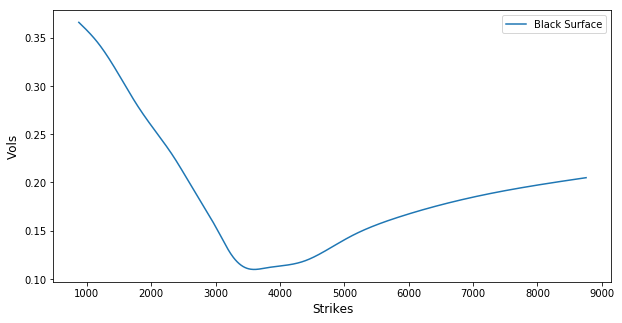

In [7]:
strikes_grid = np.arange(strikes[0], strikes[-1],10)
tenors = 1.0 # years
implied_vols = [vol_surface.getVol(tenors, s) 
                for s in strikes_grid] 

fig, ax = plt.subplots()
ax.plot(strikes_grid, implied_vols, label="Black Surface")
ax.set_xlabel("Strikes", size=12)
ax.set_ylabel("Vols", size=12)
legend = ax.legend(loc="upper right")

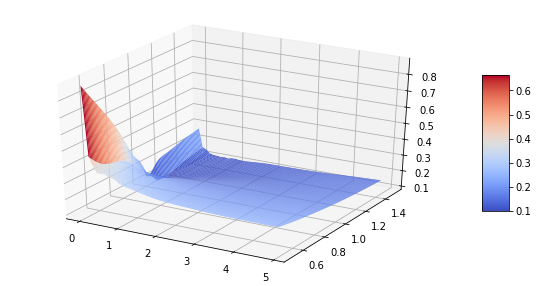

In [8]:
tenors = np.arange(0, 5, 0.1)
moneyness = np.arange(0.5, 1.5, 0.01)
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(tenors, moneyness)
Z = np.array(vol_surface.getVols(list(tenors), list(moneyness*spot)))

surf = ax.plot_surface(X, Y, Z.T, rstride=1, cstride=1, cmap=cm.coolwarm, 
                linewidth=0.1)
fig.colorbar(surf, shrink=1/2, aspect=5)

## Setup Heston Model
We calibrate model using the interpolated surfaces

In [0]:
heston_model = HestonModel(spot, val_date)
calib_tenors = np.arange(1, 5, 0.5)
calib_moneyness = np.arange(0.5, 1.5, 0.1)
calibration_points = [(tenor, strike) for strike in calib_moneyness for tenor in calib_tenors]

In [22]:
heston_model.calibrateModel(vol_surface, calibration_points)
heston_model.calibrationReport()

theta = 0.042676, kappa = 1.718864, sigma = 0.775239, rho = -0.753662, v0 = 0.023662
Average Abs Error (%) : 3.266


## Plot Volatility surface from Heston Model

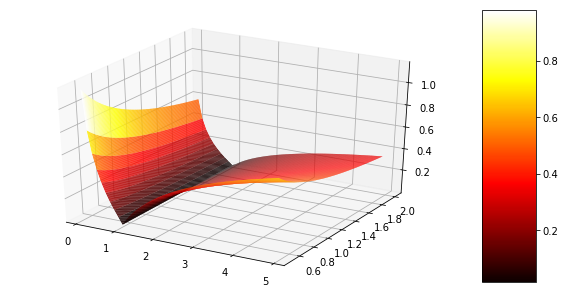

In [23]:
tenors = np.arange(0.1, 5, 0.1)
moneyness = np.arange(0.5, 2, 0.01)
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(tenors, moneyness)
Z = np.array(heston_model.option_ivs(list(tenors), list(moneyness)))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0.1)
fig.colorbar(surf,  aspect=5)

Some Random staff after this point

In [24]:
opt = BlackScholesOption(spot, val_date, vol_surface)
opt.option_vega(1, 5)/spot

0.8455114743379398

## Some Vega Weighting

In [0]:
calibration_tenors = np.linspace(0.5, 5., 10)
atm_vegas = [opt.option_vega(1, tenor) for tenor in calibration_tenors]
max_vega = (spot-strikes[0])
atm_vegas_capped =  [ a if a<max_vega else max_vega*.95 for a in atm_vegas]
num_options = [(i+2) for i in range(len(calibration_tenors))]
calibration_moneyness = [list(np.linspace(spot-vega, spot+vega, num)/spot) for num, vega in zip(num_options,atm_vegas_capped)]

### Heston Model Recalibration

In [0]:
new_heston_model = HestonModel(spot, val_date)
new_calibration_points = [] 
for (t, ss) in zip(calibration_tenors, calibration_moneyness):
    new_calibration_points+=([(t,s) for s in ss])

In [28]:
new_heston_model.calibrateModel(vol_surface, new_calibration_points)
new_heston_model.calibrationReport(False)

theta = 0.043562, kappa = 2.430817, sigma = 1.021728, rho = -0.728730, v0 = 0.000008
Average Abs Error (%) : 7.089


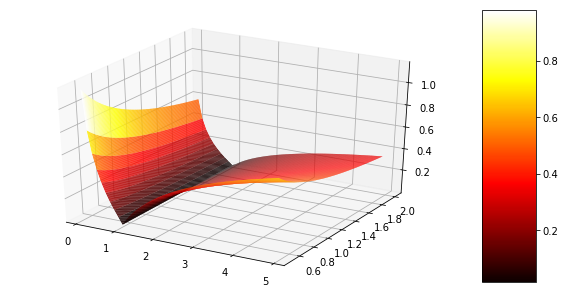

In [29]:
tenors = np.arange(0.1, 5, 0.1)
moneyness = np.arange(0.5, 2, 0.01)
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(tenors, moneyness)
Z = np.array(new_heston_model.option_ivs(list(tenors), list(moneyness)))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0.1)
fig.colorbar(surf,  aspect=5)

### Calibrate to Single Tenor

In [30]:
one_dim_heston = HestonModel(spot, val_date, theta = 0.043918, kappa = 2.108293, sigma = 0.899713, rho = -0.735146, v0 = 0.005967)
calib_tenors = [3.0]
calib_moneyness = np.linspace(0.5, 1.9, 20)
calibration_points = [(tenor, strike) for strike in calib_moneyness for tenor in calib_tenors]
one_dim_heston.calibrateModel(vol_surface, calibration_points)
one_dim_heston.calibrationReport(True)

theta = 0.048435, kappa = 1.269462, sigma = 0.683301, rho = -0.707916, v0 = 0.000000
          Tenor         Strikes    Market Value     Model Value   Relative Error (%)
           3.00         1460.45       39.18633        40.19817            2.5821165 
           3.00         1675.67       59.61940        60.00842            0.6525068 
           3.00         1890.90       86.39978        86.03597           -0.4210831 
           3.00         2106.12      121.34911       119.53919           -1.4914999 
           3.00         2321.35      165.23160       161.97399           -1.9715440 
           3.00         2536.57      218.53784       215.00798           -1.6152158 
           3.00         2751.80      284.44562       280.50946           -1.3837994 
           3.00         2967.02      362.80463       360.48141           -0.6403494 
           3.00         3182.24      332.04311       330.69605           -0.4056902 
           3.00         3397.47      238.42064       239.07036   

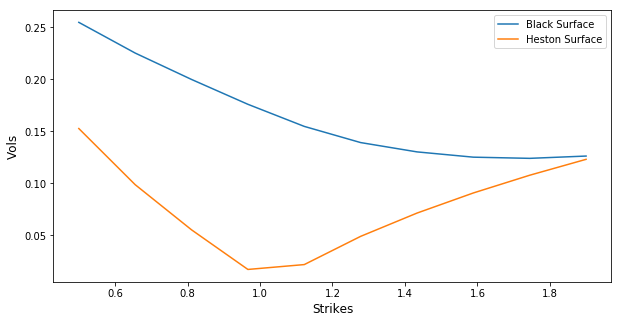

In [31]:
theta , kappa, sigma, rho, v0 = one_dim_heston.model.params()
new_one_dim_heston = HestonModel(spot, val_date, theta=theta, kappa = kappa, sigma=sigma, rho=rho, v0=v0)
strikes_grid = np.linspace(0.5, 1.9, 10)
tenors = [3.0] 
implied_vols = [vol_surface.getVol(tenors[0], s*spot) for s in strikes_grid] 
heston_vols = new_one_dim_heston.option_ivs(strikes_grid, tenors) 
fig, ax = plt.subplots()
ax.plot(strikes_grid, implied_vols, label="Black Surface")
ax.plot(strikes_grid, list(heston_vols[0]), label="Heston Surface")
ax.set_xlabel("Strikes", size=12)
ax.set_ylabel("Vols", size=12)
legend = ax.legend(loc="upper right")

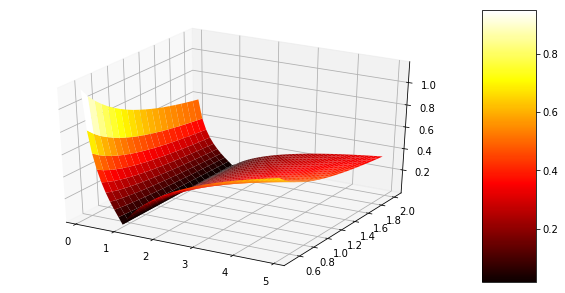

In [32]:
tenors = np.arange(0.1, 5, 0.1)
moneyness = np.linspace(0.5, 2, 20)
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(tenors, moneyness)
Z = np.array(new_one_dim_heston.option_ivs(list(tenors), list(moneyness)))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0.1)
fig.colorbar(surf,  aspect=5)

In [20]:
print(one_dim_heston.model.params())

[ 0.048435; 1.26946; 0.683301; -0.707916; 2.59432e-08 ]
